<a href="https://colab.research.google.com/github/FelSiq/antiderivative-solution-insertion-on-images/blob/master/antideriv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Example using the Antideriv module
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
%cd gdrive/'My Drive'/'Colab Notebooks'

In [0]:
!ls

In [0]:
!pip install -r requirements.txt

In [0]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import imageio

import postprocess
import preprocess
import antideriv

Using TensorFlow backend.


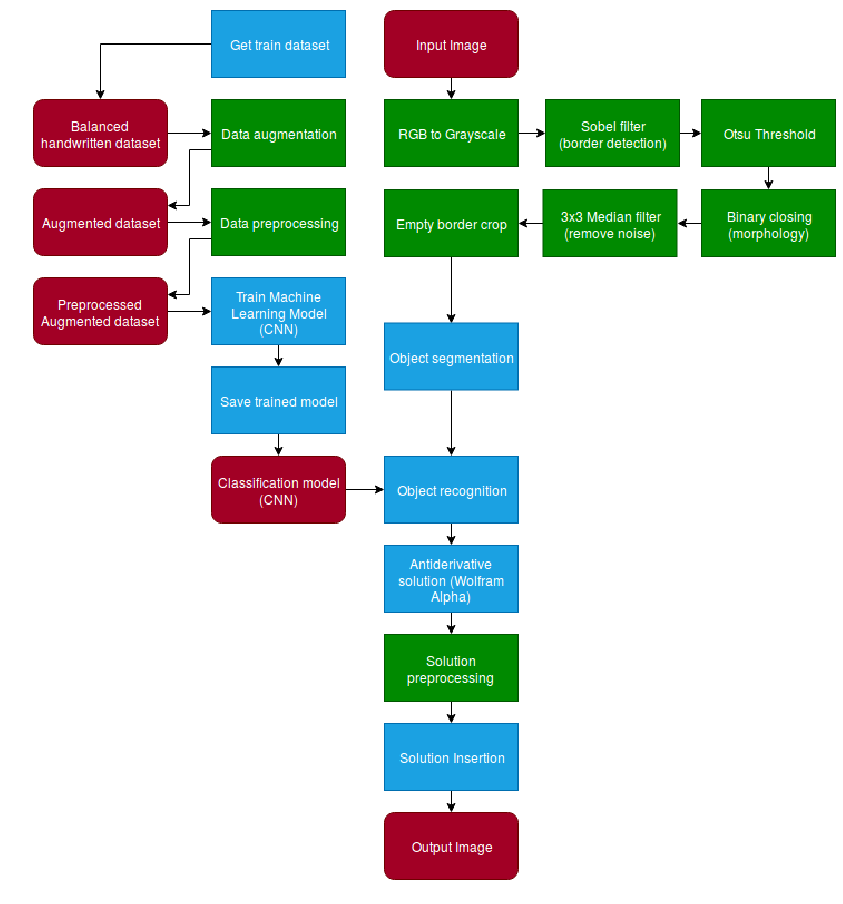

In [0]:
# Process full workflow
workflow = imageio.imread("workflow.png")
plt.figure(figsize=(20, 16))
plt.axis("off")
plt.imshow(workflow)
plt.show()

In [0]:
# Reading the input image
image_path = "sample-1.jpg"
input_img = imageio.imread(image_path)

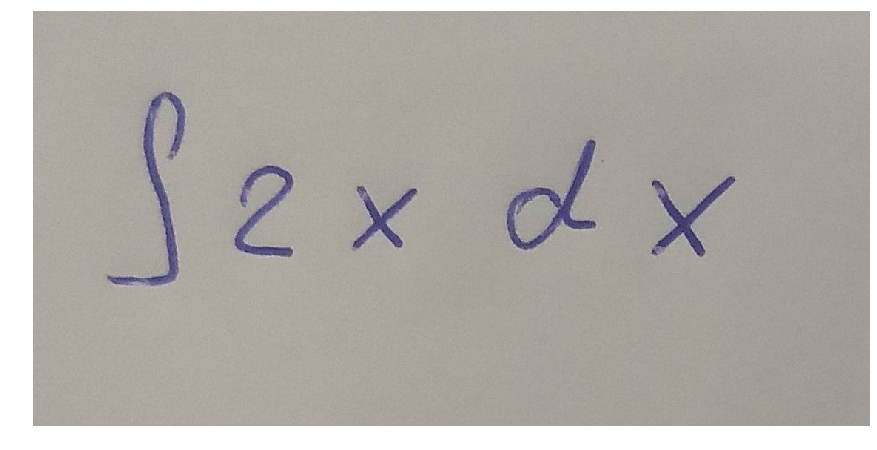

In [0]:
# Showing the input image for reference
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(input_img)
plt.show()

In [0]:
# Fit a model using the input
model = antideriv.Antideriv().fit(input_img, output_file="preprocessed.png")

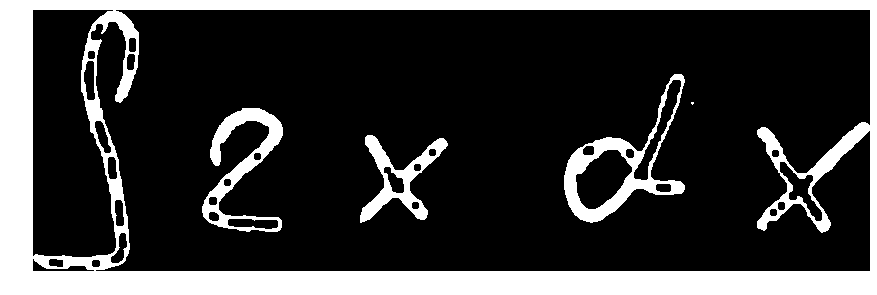

In [0]:
# Show the preprocessed image
preprocessed_img = imageio.imread("preprocessed.png")

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(preprocessed_img, cmap="gray")
plt.show()

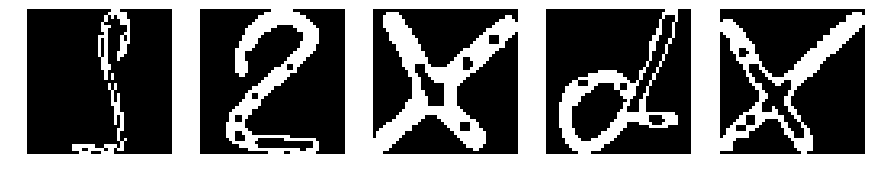

In [0]:
plt.figure(figsize=(15, 20))

# Check preprocessed image objects
for idx, seg in enumerate(model.img_segments):
    plt.subplot(1, 5, idx + 1)
    plt.axis("off")
    plt.imshow(seg.reshape(45, 45), cmap="gray")

plt.show()

In [0]:
# Solving the expression
output_img = model.solve()

Expression: integrate 2 x dx


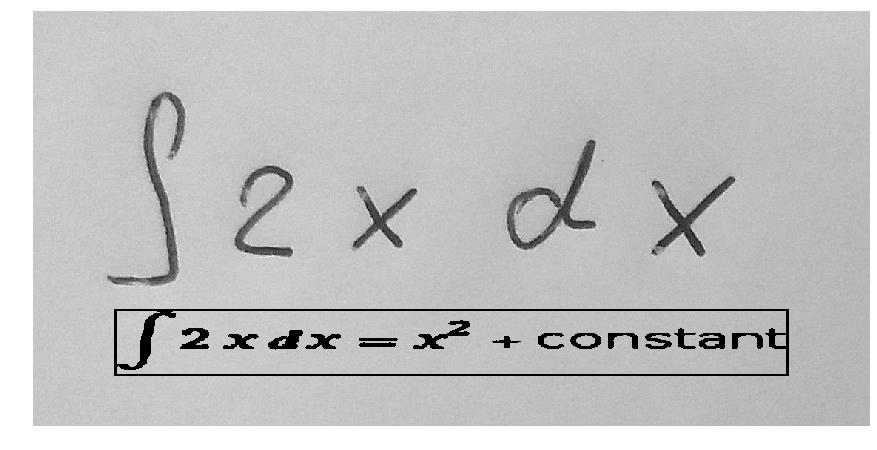

In [0]:
# Plot the output image
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(output_img, cmap="gray")
plt.show()

In [0]:
# Plotting more examples
def plot_samples(sample, figsize):
    plt.figure(figsize=figsize)
    gd = grid.GridSpec(2, 1)
    gd.update(wspace=0.0, hspace=0.0)
    
    input_img = imageio.imread("sample-" + str(sample) + ".jpg")
    model.fit(input_img)
    output_img = model.solve()

    plt.subplot(gd[0])
    plt.axis("off")
    plt.imshow(input_img, cmap="gray")

    plt.subplot(gd[1])
    plt.axis("off")
    plt.imshow(output_img, cmap="gray")

    plt.show()

Expression: 5 integrate e x dx


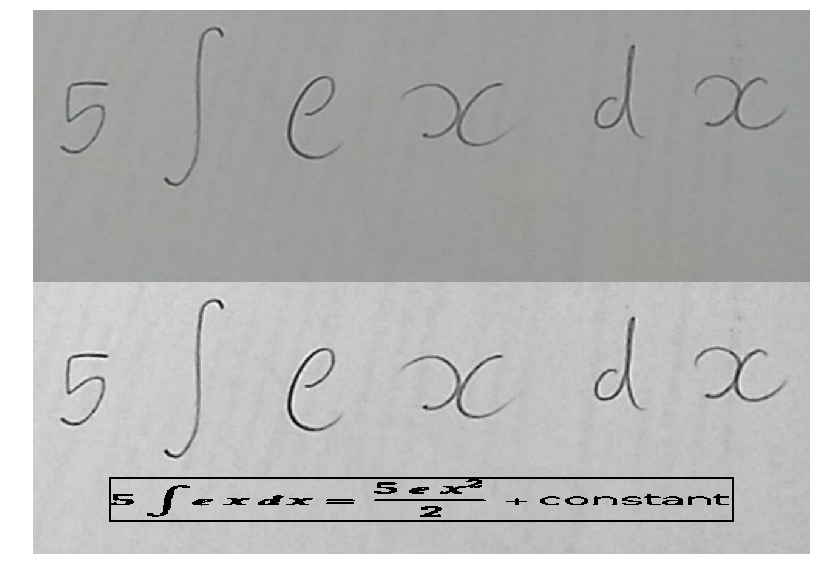

In [0]:
# More examples (1)
plot_samples(2, figsize=(30, 10))

Expression: integrate 7 x - x dx


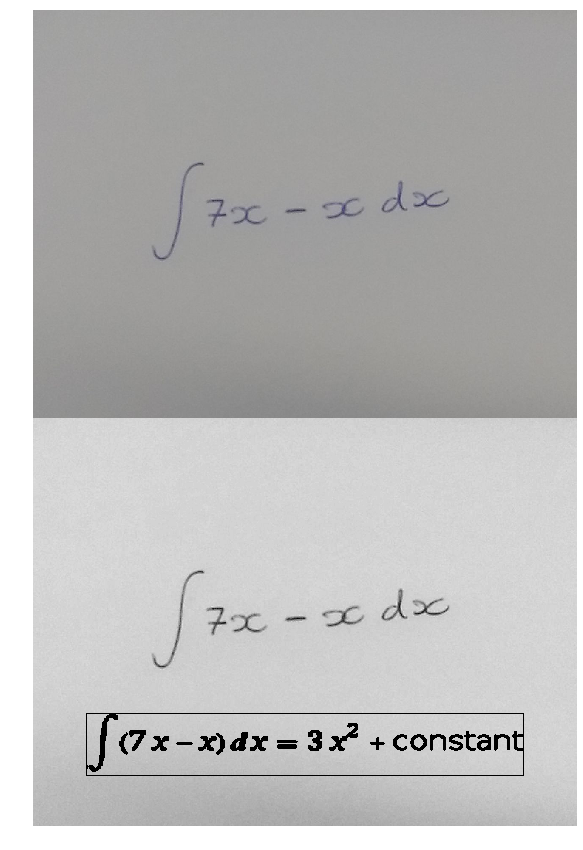

In [0]:
# More examples (2)
plot_samples(5, figsize=(15, 15))

Expression: 1 5 x dx


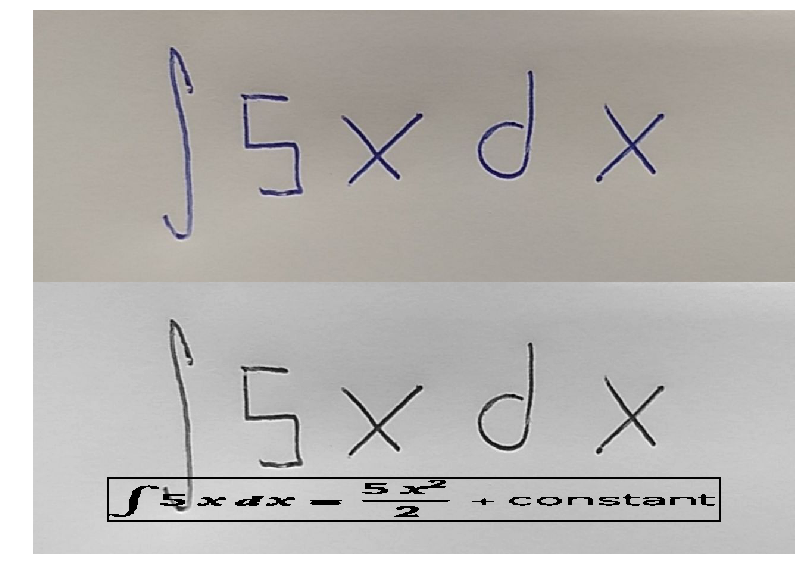

In [0]:
# More examples (3)
plot_samples(6, figsize=(30, 10))

Expression: integrate ( x 8 ) 9 dx 8


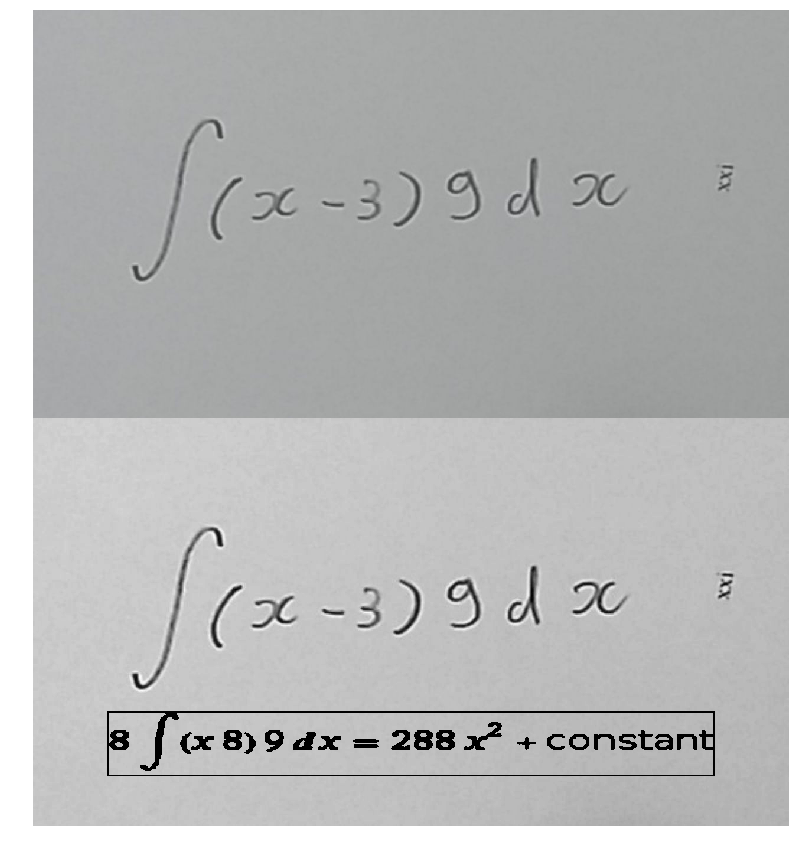

In [0]:
# The predictive model is very fragile due to lack of
# more balanced training data, so it tends get confused
# very easily
plot_samples(3, figsize=(20, 15))

Expression: integrate ( x - 8 2 9 dx


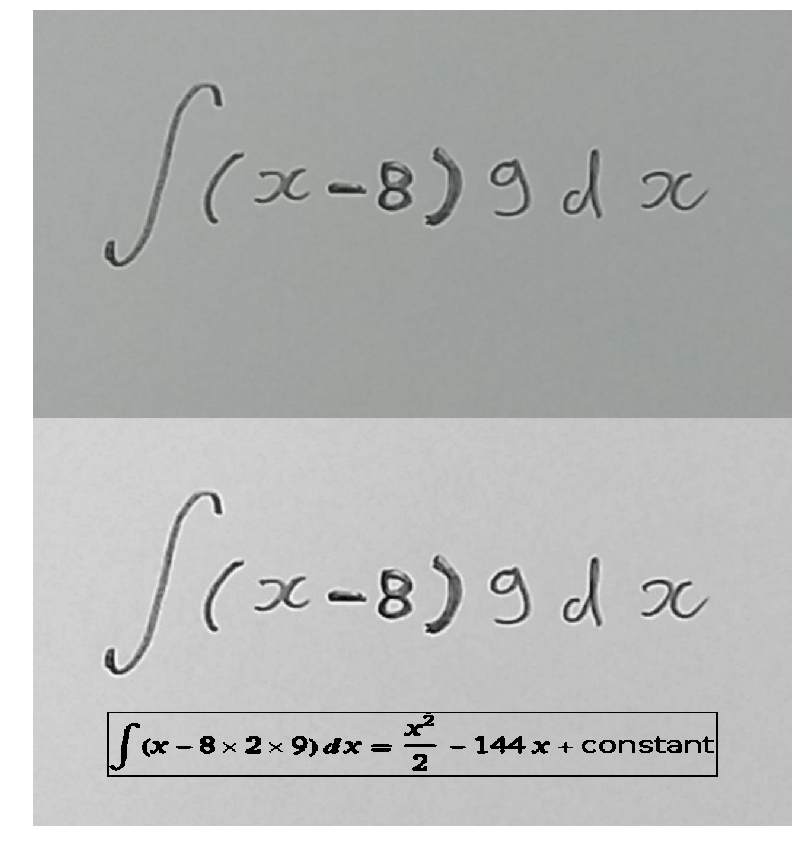

In [0]:
plot_samples(4, figsize=(20, 15))